<h2 align="center"> Univariate Linear Regression </h2>

### Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [6]:
data = pd.read_csv("bike_sharing_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


__Population in 10,000 and Profit in 10,000 USD__

In [9]:
data.shape

(97, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualize the Data
---

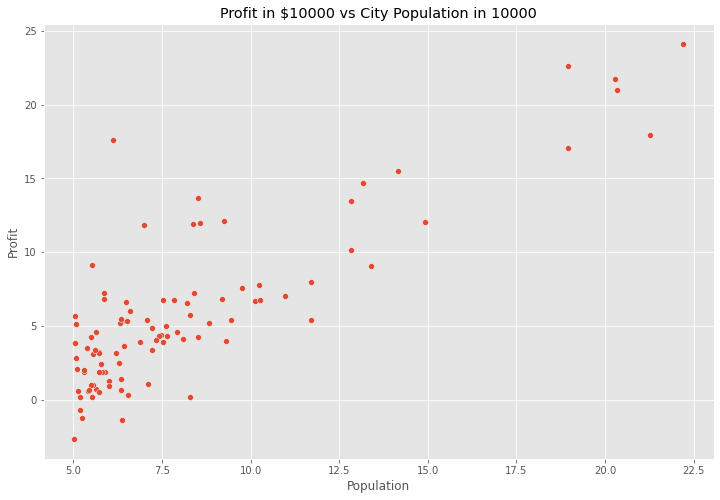

In [11]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Profit in $10000 vs City Population in 10000");

### Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [17]:
def cost_function(x, y, theta):
    m = len(y)
    y_prediction = x.dot(theta)
    error = (y_prediction - y)**2
    return (1 / (2 * m)) * np.sum(error)

In [18]:
m = data.Population.values.size
x = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

cost_function(x, y, theta)

32.072733877455676

### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [19]:
def gradient_descent(x, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_prediction = x.dot(theta)
        error = np.dot(x.transpose(), y_prediction - y)
        theta -= alpha * (1 / m) * error
        costs.append(cost_function(x, y, theta))
    return theta, costs

In [22]:
theta, costs = gradient_descent(x, y, theta, alpha=0.01, iterations=2000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = -3.89 + 1.19x1


### Visualising the Cost Function $J(\theta)$
---

In [23]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(x, y, t)

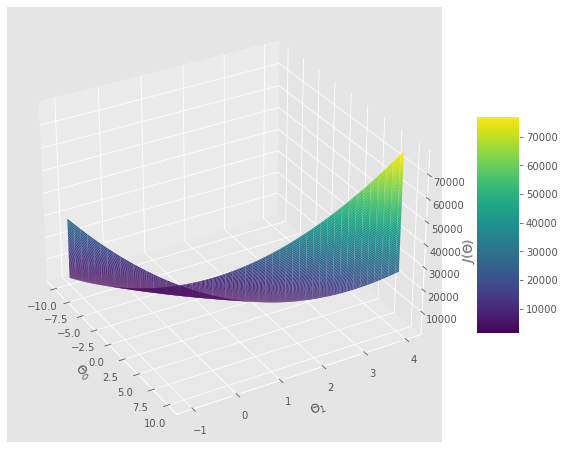

In [29]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = "3d")

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis")
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

### Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

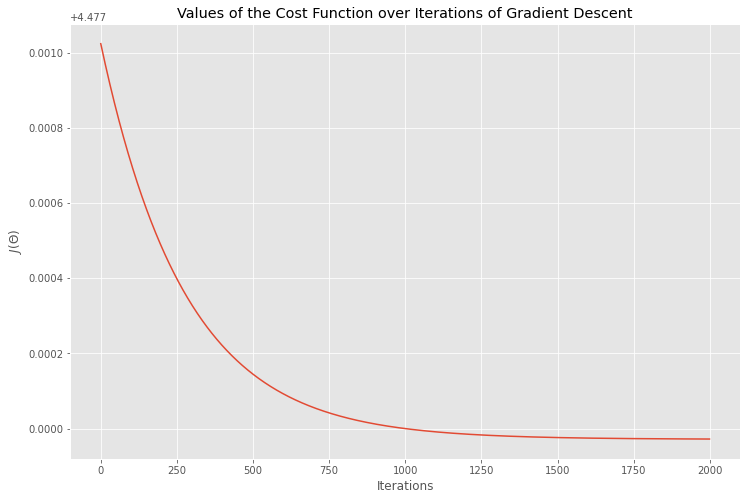

In [32]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent");

### Training Data with Linear Regression Fit
---

In [33]:
theta

array([[-3.89286253],
       [ 1.19274046]])

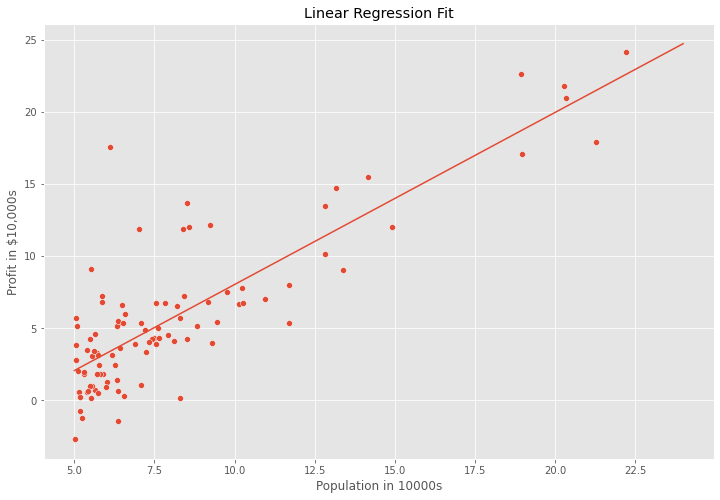

In [36]:
theta = np.squeeze(theta)
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in range(5, 25)]
sns.lineplot(x = x_value, y = y_value)
plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

### Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [37]:
def predict(x, theta):
    y_prediction = np.dot(theta.transpose(), x)
    return y_prediction

In [39]:
y_pred_1 = predict(np.array([1, 4]), theta * 10000)
print(f"for a population of 40000, the model predicts a profit of ${str(round(y_pred_1, 0))}")

for a population of 40000, the model predicts a profit of $8781.0


In [40]:
y_pred_2 = predict(np.array([1, 8.3]), theta * 10000)
print(f"for a population of 83000, the model predicts a profit of ${str(round(y_pred_2, 0))}")

for a population of 83000, the model predicts a profit of $60069.0
